In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Загрузим наш датасет:
df = pd.read_csv('main_task.csv')
# Для начала посмотрим на наши данные:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


Видно, что в нашем датасете всего 10 столбцов, из которых 3 числовых и 7 текстовых. Встречаются пропущенные значения в столбцах Cuisine Style, Price Range и Number of Reviews. Чтобы наглядно оценить количество пропущенных значений, давайте посторим диаграмму.

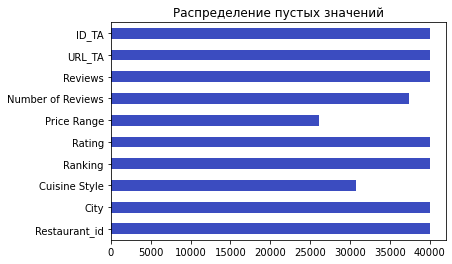

In [32]:
a = 40000 - df.isna().sum()
a.plot(kind = 'barh', colormap = 'coolwarm', title = 'Распределение пустых значений')

На диаграмме хорошо видно, что наибольшее количество пропусков в столбце Price Range. На втором месте идет столбец Cuisine Style. На третьем - Numbers of Reviews. Далее попробуем поработать с этими пропусками, но начнем с анализа столбцов по порядку их расположения. Возможно найдем, что-то интересное.

In [33]:
df.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


## 1. Проанализируем столбец Restaurant_id

Пропусков в этом столбце нет, но на всякий случай проверим на повторяющиеся значения.

In [34]:
df.Restaurant_id.value_counts().head(5)

id_436    18
id_871    18
id_227    18
id_633    18
id_321    17
Name: Restaurant_id, dtype: int64

В этом столбце имеются повторяющиеся идентификаторы ресторанов. Скорее всего это сетевые рестораны. Наверное, стоит создать новый признак rest_chain и присвоить сетевым ресторанам идентификатор 1, а несетевым - 0.

In [35]:
# Создадим список с ресторанами, у которых больше одного заведения:
rest_chain = list(df.Restaurant_id.value_counts()[df.Restaurant_id.value_counts() > 1].index)
# Добавим новый столбец в наш датафрейм:
df['rest_chain'] = df[df.Restaurant_id.isin(rest_chain)].Restaurant_id.apply(lambda x: 1)
# Присвоим ноль в этом столбце не сетевым ресторанам:
df['rest_chain'].fillna(0, inplace=True)
# Посмотрим сколько у нас сетевых и не сетевых рестранов:
df.rest_chain.value_counts()

1.0    35295
0.0     4705
Name: rest_chain, dtype: int64

Сетевых ресторанов оказалось значительно больше. Возможно, что сетевые рестораны больше заинтересованы во включении себя базу данных.

## 2. Проанализируем столбец City

Прпусков в данном столбце нет. Посмотрим на распределение ресторанов по городам.

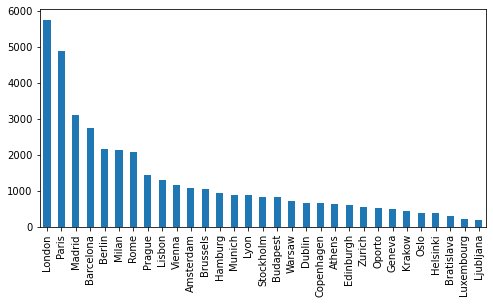

In [36]:
plt.figure(figsize=(8,4))
df.City.value_counts(ascending=False).plot(kind='bar');

Больше всего ресторанов в Париже и Лондоне. Потом добавим сюда датасет с информацией по городам и посмотрим, что произойдет. Может парочку признаков удасться оттуда вытащить.
Еще можно создать признак города. Всего 31 город, можно каждому городу присвоить пятибитное значение от 00000 до 11111.

In [37]:
city_dict = {'London': 11111,
              'Paris': 11110,
              'Madrid': 11101,
              'Barcelona': 11100,
              'Berlin': 11011,
              'Milan': 11010,
              'Rome': 11001,
              'Prague': 11000,
              'Lisbon': 11101,
              'Vienna': 10111,
              'Amsterdam': 10110,
              'Brussels': 10101,
              'Hamburg': 10100,
              'Munich': 10011,
              'Lyon': 10010,
              'Stockholm': 10001,
              'Budapest': 10000,
              'Warsaw': 1111,
              'Dublin': 1110,
              'Copenhagen': 1101,
              'Athens': 1100,
              'Edinburgh': 1011,
              'Zurich': 1010,
              'Oporto': 1001,
              'Geneva': 1000,
              'Krakow': 111,
              'Oslo': 110,
              'Helsinki': 101,
              'Bratislava': 100,
              'Luxembourg': 11,
              'Ljubljana': 10,
             }
df['city_id'] = df['City'].map(city_dict)

## 3. Проанализируем столбец Cuisine Style

Пропусков тут довольно много. Как лучше заполнить эти пропуски? Сначала посмотрим сколько и различных кухонь представлено. Учитываем, что у одного ресторана может быть сразу несколько кухонь.

In [38]:
# Создадим признак отсуствия информации о кухне:
df['Cuisine Style_NAN'] = df['Cuisine Style'].isna().astype('uint8')

In [39]:
# Пропуски заполним значением Other
df['Cuisine Style'].fillna("['Other']",inplace=True)
# Превратим значения в столбце в списки:
df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: eval(x))
# Найдем уникальные значения:
s = df['Cuisine Style'].explode()
pd.Series(s).value_counts()

Vegetarian Friendly    11189
European               10060
Other                   9283
Mediterranean           6277
Italian                 5964
                       ...  
Xinjiang                   1
Yunnan                     1
Burmese                    1
Salvadoran                 1
Latvian                    1
Name: Cuisine Style, Length: 126, dtype: int64

Без учета пропусков, которые заполнены Other, имеем 125 разных кухонь. Самое большое количество ресторанов с кухнями Vegetarian Friendly и European. Возможно, стоит проанализировать в каких ресторанах чаще встречается European или Vegetarian Friendly и затем найти признак, по которому их можно будет распределить вместо признака Other. Также можно этим ресторанам проставить европейскую кухню и вегетарианскую - два самых частых значения.
Какой числовой признак можно выделить из этого столбика? Например, количество кухонь в одном ресторане.

In [40]:
df['cuisine_count'] = df['Cuisine Style'].apply(lambda x: len(x))

## 4. Проанализируем столбец Ranking

Место, которое занимает данный ресторан среди всех ресторанов своего города. Будем проверять, когда загрузим информацию по городам.

## 5. Проанализируем столбец Rating

Рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель). С этим признаком ничего не нужно делать.

## 6. Проанализируем столбец Price Range

In [41]:
# Присвоим новому признаку значение отсутствия информации о ценовом диапазоне:
df['Price Range_NAN'] = df['Price Range'].isna().astype('uint8')

In [42]:
# Присвоим отсутствующим значениям средний ценовой диапазон:
df['Price Range'].fillna('$$ - $$$', inplace=True)

In [43]:
# Создадим признак ценового диапазона:
price_dict = {'$': 1,
              '$$ - $$$': 2,
              '$$$$': 3,
             }
df['Price Range'] = df['Price Range'].map(price_dict)

## 7. Проанализируем столбец Number of Reviews

In [44]:
# Создадим признак отсутствия отзывов
df['Number of Reviews_NAN'] = df['Number of Reviews'].isna().astype('uint8')

## 8. Проанализируем столбец Reviews

In [45]:
# Когда был оставлен самый свежий отзыв?
df['Reviews'] = df.Reviews.dropna().apply(lambda x: eval(x.replace('nan', '').replace('[,', "['',")))
df['Reviews'] = df.Reviews.dropna().apply(lambda x: np.nan if len(x[0]) == 0 & len(x[1]) == 0 else x)

# Создадим новые признаки, date и date_1, date_2
df['date'] = df['Reviews'].dropna().apply(lambda x: x[1]) # Присвоили второе значение

# Если в date имеется два значения, то присваивается второе значение, или никакое.
df['date_1'] = df['date'].dropna().apply(lambda x: x[1] if len(x) == 2 else np.nan)
# Если в date значений больше нуля, то присваивается первое значение, или никакое.
df['date_2'] = df['date'].dropna().apply(lambda x: x[0] if len(x) > 0 else np.nan)

# Найдем количество дней между отзывами.
df['date_1'] = pd.to_datetime(df['date_1'])
df['date_2'] = pd.to_datetime(df['date_2'])
df['review_days'] = abs(df['date_2'] - df['date_1']).dt.days

# Тестируем модель

In [46]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
# Удалим столбцы типа object (попросили в условии модуля, так, для примера)
# Потому что машинное обучение не работает с object
X = df.drop(['Restaurant_id','City','Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA' ,'Rating','date', 'date_1', 'date_2'], axis = 1)  
y = df['Rating']
# Также заполним пропущенные значения нулями:
X = X.fillna(0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ranking                40000 non-null  float64
 1   Number of Reviews      40000 non-null  float64
 2   rest_chain             40000 non-null  float64
 3   city_id                40000 non-null  int64  
 4   Cuisine Style_NAN      40000 non-null  uint8  
 5   cuisine_count          40000 non-null  int64  
 6   Price Range_NAN        40000 non-null  uint8  
 7   Number of Reviews_NAN  40000 non-null  uint8  
 8   review_days            40000 non-null  float64
dtypes: float64(4), int64(2), uint8(3)
memory usage: 1.9 MB


In [47]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели 

# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train) 

RandomForestRegressor()

In [48]:
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)
y_pred

array([3.87, 3.28, 4.46, ..., 5.  , 5.  , 4.  ])

In [49]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений
# от фактических.  
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 

MAE: 0.2206125
